In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta

end_date = datetime.now().strftime('%Y-%m-%d')
start_date = (datetime.now() - timedelta(days=365)).strftime('%Y-%m-%d')

data = yf.download(tickers=["AAPL", "MSFT"], start=start_date, end=end_date)

/tmp/ipykernel_4313/3318178812.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers=["AAPL", "MSFT"], start=start_date, end=end_date)
[*********************100%***********************]  2 of 2 completed


In [35]:
data.head()

Price            Close                    High                     Low  \
Ticker            AAPL        MSFT        AAPL        MSFT        AAPL   
Date                                                                     
2024-11-06  221.688248  417.048981  225.022735  417.316988  220.165337   
2024-11-07  226.426208  422.259888  226.824365  423.669320  223.529700   
2024-11-08  226.157166  419.391418  227.851149  423.321902  225.609108   
2024-11-11  223.436813  414.895172  224.901615  421.644489  220.716475   
2024-11-12  223.436813  419.877747  224.792003  421.277243  222.569896   

Price                         Open                Volume            
Ticker            MSFT        AAPL        MSFT      AAPL      MSFT  
Date                                                                
2024-11-06  407.460960  221.578757  409.346826  54561100  26681800  
2024-11-07  416.751256  223.589420  418.140818  42137700  19901800  
2024-11-08  418.637072  226.366414  422.150702  38328800  16891400  
2024-11-11  412.900140  224.204094  419.371545  42005600  24503300  
2024-11-12  414.091203  223.755689  415.133366  40398300  19401200

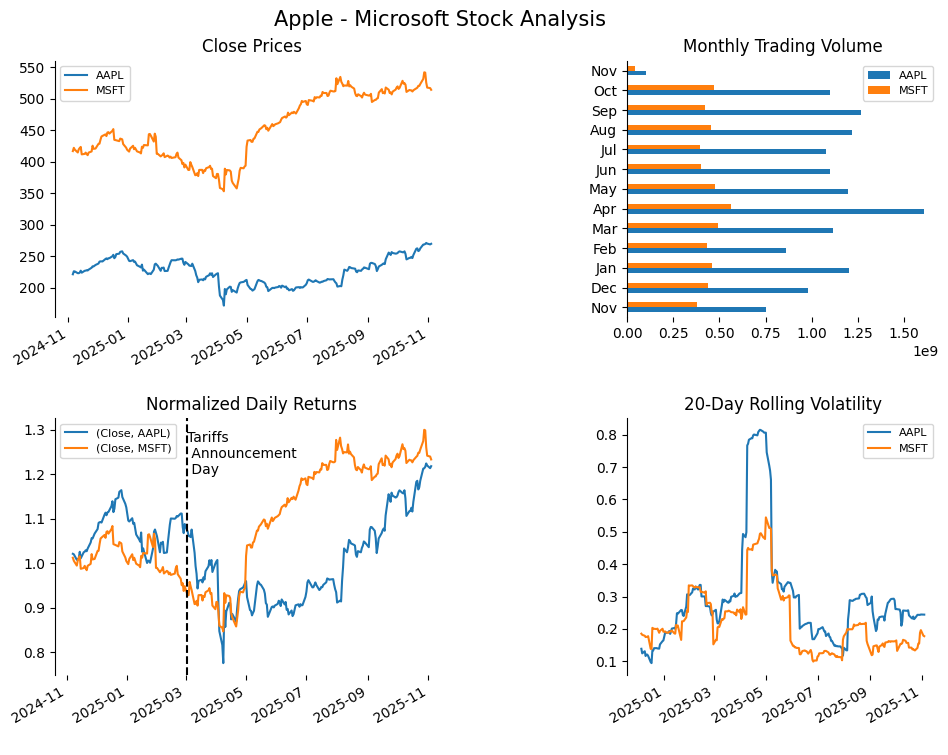

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(layout = "constrained", figsize=(12, 10))

gs = GridSpec(3,3, figure = fig, wspace=0.3, width_ratios=[1.9,1.5,1])

fig.suptitle("Apple - Microsoft Stock Analysis", fontsize=15, ha="right")

ax1 = plt.subplot(gs.new_subplotspec((0,0), colspan=1))
ax2 = plt.subplot(gs.new_subplotspec((0,1), colspan=1))
ax3 = plt.subplot(gs.new_subplotspec((1,0), colspan=1))
ax4 = plt.subplot(gs.new_subplotspec((1,1), colspan=1))

#=====================================================================================================================================================================================

data["Close"].plot(ax = ax1)



ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
ax1.legend(fontsize=8)
ax1.set_xlabel(" ")

ax1.set_title("Close Prices")


#===================================================================================================================================================================================

volume = (data
    .pivot_table(index = pd.Grouper(freq="ME"), values = "Volume", aggfunc="sum")
             )
month_labels = volume.index.strftime("%b")

volume.plot(kind="barh",ax=ax2)


ax2.set_yticklabels(month_labels);
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.legend(fontsize=8)
ax2.set_ylabel(" ")
ax2.set_title("Monthly Trading Volume")

#====================================================================================================================================================================================

close_price_df = data[["Close"]]

xval = "2025-03-02"

norm_daily_returns = close_price_df.pct_change()
cummulative_returns  = (1 + norm_daily_returns).cumprod()
cummulative_returns.plot(ax = ax3)


ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)
ax3.spines["bottom"].set_visible(False)
ax3.legend(fontsize=8)


ax3.spines["top"].set_visible(False)
ax3.set_xlabel(" ")
ax3.set_title("Normalized Daily Returns")

ax3.axvline(x=xval, linestyle = "--", color = "black")
ax3.text(xval, 1.2, "Tariffs\n Announcement\n Day")

#======================================================================================================================================================================================================

returns = (data.pivot_table(
    index = "Date", 
    values = "Close", 
     aggfunc="sum")
    .pct_change()
    .iloc[1:]
)

risk = (returns.rolling(window = 20).std() * (250 ** 0.5))

risk.plot(ax = ax4)

ax4.spines["top"].set_visible(False)
ax4.spines["right"].set_visible(False)
ax4.spines["bottom"].set_visible(False)
ax4.legend(fontsize=8)
ax4.set_title("20-Day Rolling Volatility")

ax4.set_xlabel(" ")

fig.savefig("apple_microsoft_stock_analysis")